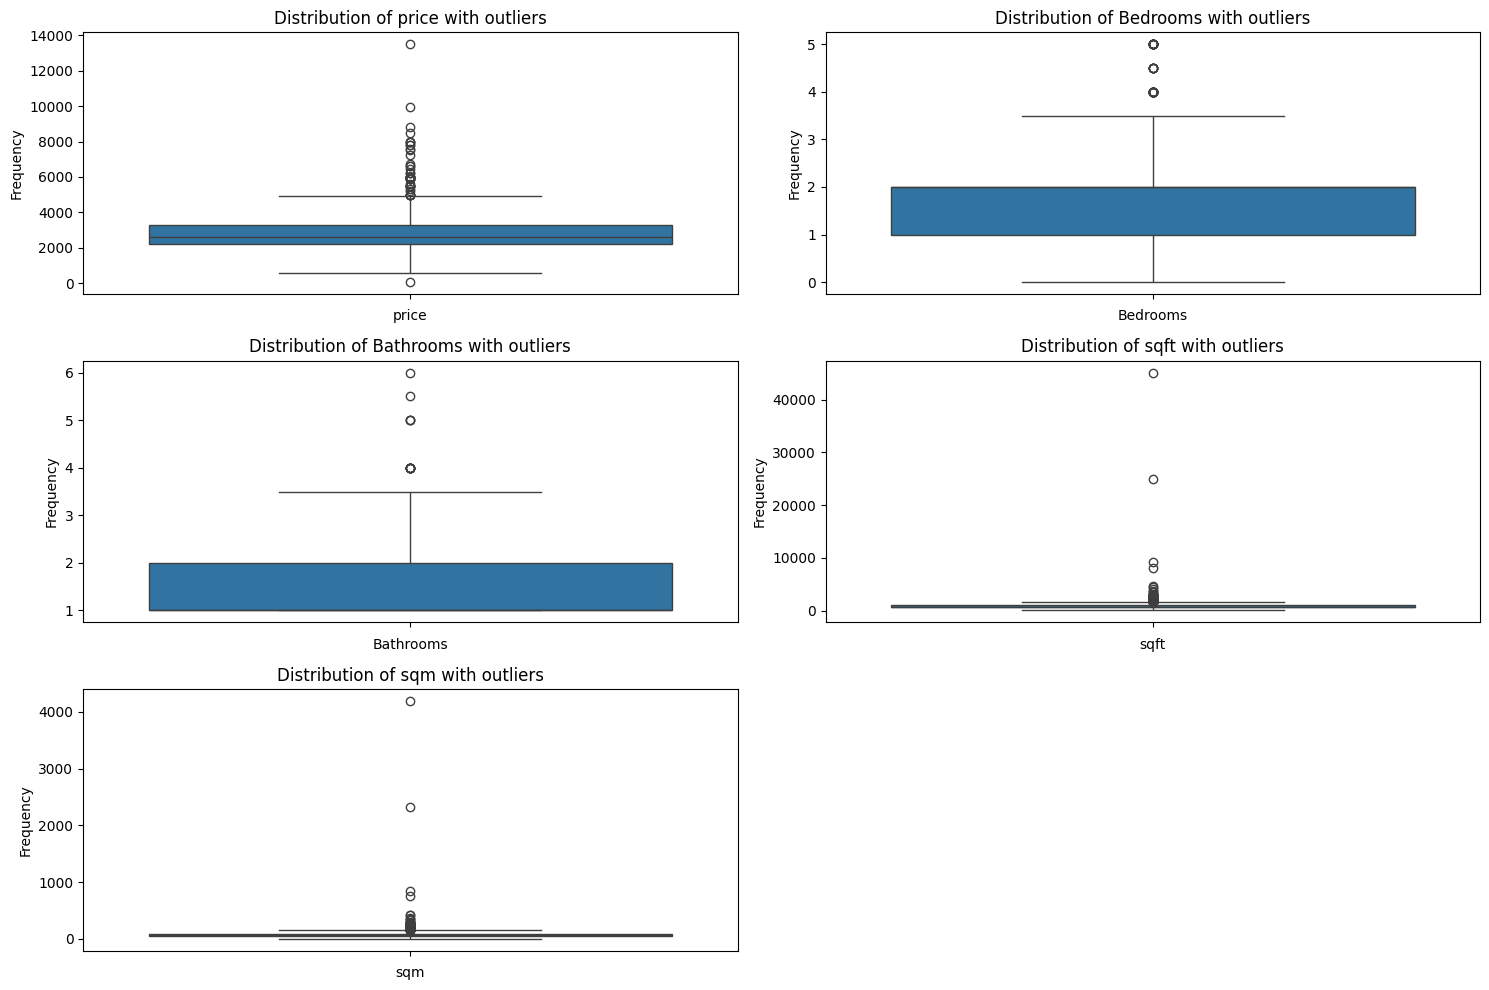

In [61]:
import importlib
import transforming_functions
importlib.reload(transforming_functions)

import matplotlib.pyplot as plt
import seaborn as sns
from transforming_functions import remove_outliers
from transforming_functions import turn_price_to_float
from transforming_functions import turn_string_to_numbers
import pandas as pd
import ast

listings_df = pd.read_csv("listings.csv")

listings_df['price'] = listings_df['price'].apply(turn_price_to_float)


listings_df['attributes'] = listings_df['attributes'].apply(ast.literal_eval)
# Normalize the 'attributes' column to create separate columns for each attribute
attributes_df = pd.json_normalize(listings_df['attributes'])
# Concatenate the original dataframe with the new attributes dataframe
listings_df = pd.concat([listings_df.drop(columns=['attributes']), attributes_df], axis=1)
# Rename the column 'Size (sqft)' to 'sqft'
listings_df.rename(columns={'Size (sqft)': 'sqft'}, inplace=True)
# Remove any non-numeric characters and convert to numeric
listings_df['sqft'] = listings_df['sqft'].str.replace('sqft', '').str.replace(',', '').astype(float)
# Create a new column 'sqm' by converting 'sqft' to square meters
listings_df['sqm'] = listings_df['sqft'] * 0.092903

listings_df['Bathrooms'] = listings_df['Bathrooms'].apply(turn_string_to_numbers)
listings_df['Bedrooms'] = listings_df['Bedrooms'].apply(turn_string_to_numbers)
listings_df['Parking included'] = listings_df['Parking included'].apply(turn_string_to_numbers)
listings_df.describe()

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(listings_df[col])
    plt.title(f'Distribution of {col} with outliers')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [62]:
#cleaning the data.
# Remove rows with missing values
data_cleaned = listings_df.dropna()


In [63]:

summary_stats = data_cleaned.describe()

# Display the summary statistics
summary_stats

,price,Bedrooms,Bathrooms,Parking included,sqft,sqm
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,2802.122591,1.797995,1.360062,0.805705,948.030840,88.074909
std,1068.000667,0.970862,0.652542,0.830104,1513.298079,140.589931
min,55.000000,0.000000,1.000000,0.000000,10.000000,0.929030
25%,2200.000000,1.000000,1.000000,0.000000,600.000000,55.741800
50%,2600.000000,2.000000,1.000000,1.000000,756.000000,70.234668
75%,3300.000000,2.000000,2.000000,1.000000,1000.000000,92.903000
max,13500.000000,5.000000,6.000000,3.000000,45120.000000,4191.783360


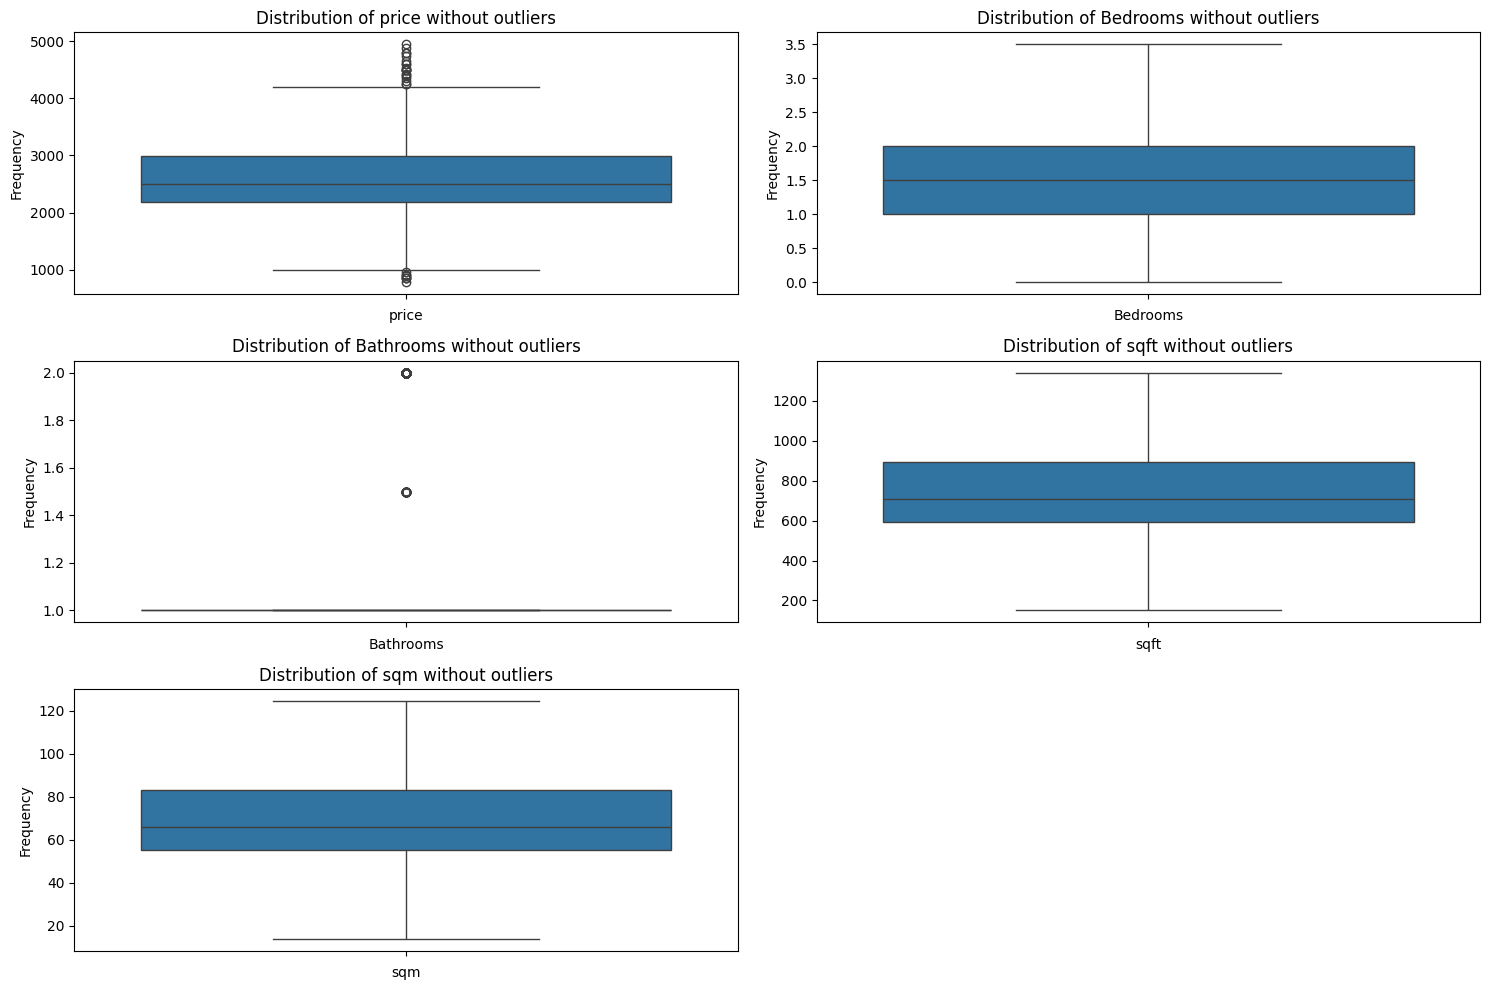

In [64]:
numeric_cols = ['price', 'Bedrooms', 'Bathrooms', 'sqft', 'sqm']

# Remove outliers from the dataset
data_no_outliers = remove_outliers(data_cleaned, numeric_cols)

# Recalculate summary statistics for the cleaned data
summary_stats_no_outliers = data_no_outliers[numeric_cols].describe().T
summary_stats_no_outliers['median'] = data_no_outliers[numeric_cols].median()
summary_stats_no_outliers['mode'] = data_no_outliers[numeric_cols].mode().iloc[0]

# Rearrange columns
summary_stats_no_outliers = summary_stats_no_outliers[['mean', 'median', 'mode', 'std', 'min', '25%', '50%', '75%', 'max']]

# Visualize the distribution of key numeric variables without outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data_no_outliers[col])
    plt.title(f'Distribution of {col} without outliers')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()